In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

In [2]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

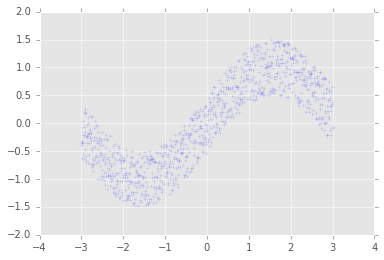

In [3]:
n_observations = 1000

xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

X = tf.placeholder(tf.float32, name='X')

Y = tf.placeholder(tf.float32, name='Y')

2.59386
1.81847
2.94206
1.81592
2.9879
3.24434
3.13632
1.98588
2.18321
1.85855


/Users/jaimec/anaconda/envs/py3k/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


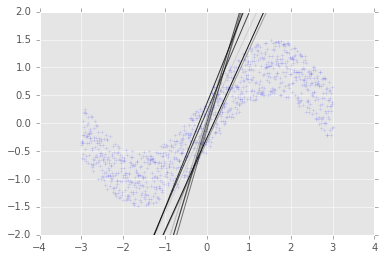

In [4]:
n_neurons = 100

W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X, 1), W) + b

Y_pred = tf.reduce_sum(h, 1)

train(X, Y, Y_pred)